# Imports

In [1]:
import importlib
import sys
import torch

sys.path.insert(0, '..')
sys.path.insert(1, '../..')
sys.path.insert(2, '../../..')
sys.path.insert(3, '../../../..')

# Data

### Load Data Files

In [2]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../encoded_data/repair_shop_5_train.pkl'
# Load the dataset using torch.load
BPIC_17_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(BPIC_17_train_dataset))  # Should output something like <class 'torch.utils.data.dataset.TensorDataset'>

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../encoded_data/repair_shop_5_val.pkl'
# Load the dataset using torch.load
BPIC_17_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(BPIC_17_val_dataset))  # Should output something like <class 'torch.utils.data.dataset.TensorDataset'>

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>
<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


### Train Data Insights

In [3]:
# BPIC 17 Dataset Categories, Features:

bpic_17_all_categories = BPIC_17_train_dataset.all_categories

bpic_17_all_categories_cat = bpic_17_all_categories[0]
print(bpic_17_all_categories_cat)

bpic_17_all_categories_num = bpic_17_all_categories[1]
print(bpic_17_all_categories_num)

for i, cat in enumerate(bpic_17_all_categories_cat):
     print(f"BPIC 17 (5) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"BPIC 17 (5) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(bpic_17_all_categories_num):
     print(f"BPIC 17 (5) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"BPIC 17 (5) Amount Category Lables: {num[1]}")

[('concept:name', 9, {'ACKNOWLEDGEMENT': 1, 'CREATE_INVOICE': 2, 'DISASSEMBLY': 3, 'EOS': 4, 'QUALITY_CONTROL': 5, 'RECEPTION': 6, 'REPAIR': 7, 'SHIPPING': 8})]
[('case_elapsed_time', 1, {}), ('event_elapsed_time', 1, {}), ('day_in_week', 1, {}), ('seconds_in_day', 1, {})]
BPIC 17 (5) Categorical feature: concept:name, Index position in categorical data list: 0
BPIC 17 (5) Total Amount of Category labels: 9


BPIC 17 (5) Numerical feature: case_elapsed_time, Index position in categorical data list: 0
BPIC 17 (5) Amount Category Lables: 1
BPIC 17 (5) Numerical feature: event_elapsed_time, Index position in categorical data list: 1
BPIC 17 (5) Amount Category Lables: 1
BPIC 17 (5) Numerical feature: day_in_week, Index position in categorical data list: 2
BPIC 17 (5) Amount Category Lables: 1
BPIC 17 (5) Numerical feature: seconds_in_day, Index position in categorical data list: 3
BPIC 17 (5) Amount Category Lables: 1


### Input Features for Encoder and Decoder

In [ ]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in bpic_17_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in bpic_17_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

# Decoder features:
dec_feat_cat = enc_feat_cat
dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['concept:name'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day']]
Features decoder:  [['concept:name'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day']]


# Model

In [5]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Prediction decoder output sequence length
seq_len_pred = 4

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 2

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=bpic_17_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('concept:name', 9, {'ACKNOWLEDGEMENT': 1, 'CREATE_INVOICE': 2, 'DISASSEMBLY': 3, 'EOS': 4, 'QUALITY_CONTROL': 5, 'RECEPTION': 6, 'REPAIR': 7, 'SHIPPING': 8})], [('case_elapsed_time', 1, {}), ('event_elapsed_time', 1, {}), ('day_in_week', 1, {}), ('seconds_in_day', 1, {})])
Encoder input features:  [['concept:name'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day']]
Decoder input+output features:  [['concept:name'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day']]


Sequence length of decoder output:  4


Cells hidden size:  128
Number of LSTM layer:  2
Dropout rate:  0.1


Encoder number of labels for each input feature (categorical, numerical):  [[9], [1, 1, 1, 1]]
Encoder indices of tensors in dataset used as input:  [[0], [0, 1, 2, 3]]
Embeddings encoder:  ModuleList(
  (0): Embedding(9, 5)
)
Total embedding feature size encoder:  5
Total numerical feature size encoder:  4
Input feature size encoder:  

# Loss Object Creation

In [6]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

# Training Configuration

In [7]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(comment="Full_Repair_shop_no_grad")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start learning rate
learning_rate = 1e-6

# Optimizer and Scheduler
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=0)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-10)

# Epochs
num_epochs = 200

# BATCHING does not work currntly with custom implementation
batch_size = 256

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
regularization_term = 1.0/(2.0*batch_size)

# shuffle data
shuffle = True

# Teacher forcing: Smaller 0.5 more target events are used for next event prediction.
teacher_forcing_ratio = 0.8

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio,}

suffix_data_split_value = 4

# GradNorm parameter
gradNorm = {"use_gradnorm":False}

## Changed name because of good results of actual model

trainer = Trainer(device=device,
                  model=model,
                  data_train=BPIC_17_train_dataset,
                  data_val=BPIC_17_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature= [],
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'repair_shop_full_no_grad_norm_new_1.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda
Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(9, 5)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(9, 5)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=9, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=9, out_features=128, bias=True)
      (Uf): Linear(in_features=128, out_features=128, bias=True)
      (Wc): Linear(in_features=9, out_features=128, bias=True)
      (Uc): Linear(in_features=128, out_features=128, bias=True)
      (Wo): Linear(in_features=9, out_features=128, bias=True)
      (Uo): Linear(in_features=128, out_features=128, bias=True)
    )
    (hidden_layers): ModuleList(
      (0): DropoutUncertaintyLSTMCell(
        (Wi): Linear(in_features=128, out_features=128, bias=True)
        (Ui): Linear(in_features=128, out_features=128, bias=True)
 

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch [1/200], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.9030


Validation: Avg Standard Validation Loss: 6.6896
Validation: Avg Attenuated Validation Loss: 4.8581
Validation Loss for Scheduler: 6.6896
saving model


Epoch [2/200], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8995


Validation: Avg Standard Validation Loss: 6.7147
Validation: Avg Attenuated Validation Loss: 4.8694
Validation Loss for Scheduler: 6.7147
saving model


Epoch [3/200], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8957


Validation: Avg Standard Validation Loss: 6.6710
Validation: Avg Attenuated Validation Loss: 4.8466
Validation Loss for Scheduler: 6.6710
saving model


Epoch [4/200], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8925


Validation: Avg Standard Validation Loss: 6.6888
Validation: Avg Attenuated Validation Loss: 4.8548
Validation Loss for Scheduler: 6.6888
saving model


Epoch [5/200], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8893


Validation: Avg Standard Validation Loss: 6.7192
Validation: Avg Attenuated Validation Loss: 4.8684
Validation Loss for Scheduler: 6.7192
saving model


Epoch [6/200], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8846


Validation: Avg Standard Validation Loss: 6.6978
Validation: Avg Attenuated Validation Loss: 4.8551
Validation Loss for Scheduler: 6.6978
saving model


Epoch [7/200], Learning Rate: 1e-07, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8835


Validation: Avg Standard Validation Loss: 6.7332
Validation: Avg Attenuated Validation Loss: 4.8740
Validation Loss for Scheduler: 6.7332
saving model


Epoch [8/200], Learning Rate: 1e-07, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8830


Validation: Avg Standard Validation Loss: 6.7245
Validation: Avg Attenuated Validation Loss: 4.8676
Validation Loss for Scheduler: 6.7245
saving model


Epoch [9/200], Learning Rate: 1e-07, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8834


Validation: Avg Standard Validation Loss: 6.7051
Validation: Avg Attenuated Validation Loss: 4.8584
Validation Loss for Scheduler: 6.7051
saving model


Epoch [10/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8829


Validation: Avg Standard Validation Loss: 6.7503
Validation: Avg Attenuated Validation Loss: 4.8821
Validation Loss for Scheduler: 6.7503
saving model


Epoch [11/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8834


Validation: Avg Standard Validation Loss: 6.6779
Validation: Avg Attenuated Validation Loss: 4.8455
Validation Loss for Scheduler: 6.6779
saving model


Epoch [12/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8829


Validation: Avg Standard Validation Loss: 6.7070
Validation: Avg Attenuated Validation Loss: 4.8583
Validation Loss for Scheduler: 6.7070
saving model


Epoch [13/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8830


Validation: Avg Standard Validation Loss: 6.6592
Validation: Avg Attenuated Validation Loss: 4.8351
Validation Loss for Scheduler: 6.6592
saving model


Epoch [14/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8829


Validation: Avg Standard Validation Loss: 6.6702
Validation: Avg Attenuated Validation Loss: 4.8408
Validation Loss for Scheduler: 6.6702
saving model


Epoch [15/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8831


Validation: Avg Standard Validation Loss: 6.7175
Validation: Avg Attenuated Validation Loss: 4.8640
Validation Loss for Scheduler: 6.7175
saving model


Epoch [16/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8828


Validation: Avg Standard Validation Loss: 6.6953
Validation: Avg Attenuated Validation Loss: 4.8508
Validation Loss for Scheduler: 6.6953
saving model


Epoch [17/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8824


Validation: Avg Standard Validation Loss: 6.6987
Validation: Avg Attenuated Validation Loss: 4.8542
Validation Loss for Scheduler: 6.6987
saving model


Epoch [18/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8821


Validation: Avg Standard Validation Loss: 6.6968
Validation: Avg Attenuated Validation Loss: 4.8519
Validation Loss for Scheduler: 6.6968
saving model


Epoch [19/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8831


Validation: Avg Standard Validation Loss: 6.7226
Validation: Avg Attenuated Validation Loss: 4.8663
Validation Loss for Scheduler: 6.7226
saving model


Epoch [20/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8822


Validation: Avg Standard Validation Loss: 6.6579
Validation: Avg Attenuated Validation Loss: 4.8341
Validation Loss for Scheduler: 6.6579
saving model


Epoch [21/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8828


Validation: Avg Standard Validation Loss: 6.6628
Validation: Avg Attenuated Validation Loss: 4.8363
Validation Loss for Scheduler: 6.6628
saving model


Epoch [22/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8815


Validation: Avg Standard Validation Loss: 6.6884
Validation: Avg Attenuated Validation Loss: 4.8493
Validation Loss for Scheduler: 6.6884
saving model


Epoch [23/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8824


Validation: Avg Standard Validation Loss: 6.7023
Validation: Avg Attenuated Validation Loss: 4.8565
Validation Loss for Scheduler: 6.7023
saving model


Epoch [24/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8822


Validation: Avg Standard Validation Loss: 6.6538
Validation: Avg Attenuated Validation Loss: 4.8314
Validation Loss for Scheduler: 6.6538
saving model


Epoch [25/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8828


Validation: Avg Standard Validation Loss: 6.6839
Validation: Avg Attenuated Validation Loss: 4.8477
Validation Loss for Scheduler: 6.6839
saving model


Epoch [26/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8822


Validation: Avg Standard Validation Loss: 6.7054
Validation: Avg Attenuated Validation Loss: 4.8590
Validation Loss for Scheduler: 6.7054
saving model


Epoch [27/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8819


Validation: Avg Standard Validation Loss: 6.6717
Validation: Avg Attenuated Validation Loss: 4.8401
Validation Loss for Scheduler: 6.6717
saving model


Epoch [28/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8819


Validation: Avg Standard Validation Loss: 6.6706
Validation: Avg Attenuated Validation Loss: 4.8394
Validation Loss for Scheduler: 6.6706
saving model


Epoch [29/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8826


Validation: Avg Standard Validation Loss: 6.7191
Validation: Avg Attenuated Validation Loss: 4.8657
Validation Loss for Scheduler: 6.7191
saving model


Epoch [30/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8821


Validation: Avg Standard Validation Loss: 6.6887
Validation: Avg Attenuated Validation Loss: 4.8500
Validation Loss for Scheduler: 6.6887
saving model


Epoch [31/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8819


Validation: Avg Standard Validation Loss: 6.6896
Validation: Avg Attenuated Validation Loss: 4.8495
Validation Loss for Scheduler: 6.6896
saving model


Epoch [32/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8817


Validation: Avg Standard Validation Loss: 6.6789
Validation: Avg Attenuated Validation Loss: 4.8441
Validation Loss for Scheduler: 6.6789
saving model


Epoch [33/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8816


Validation: Avg Standard Validation Loss: 6.6730
Validation: Avg Attenuated Validation Loss: 4.8408
Validation Loss for Scheduler: 6.6730
saving model


Epoch [34/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8819


Validation: Avg Standard Validation Loss: 6.6912
Validation: Avg Attenuated Validation Loss: 4.8524
Validation Loss for Scheduler: 6.6912
saving model


Epoch [35/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8819


Validation: Avg Standard Validation Loss: 6.6937
Validation: Avg Attenuated Validation Loss: 4.8535
Validation Loss for Scheduler: 6.6937
saving model


Epoch [36/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8816


Validation: Avg Standard Validation Loss: 6.6604
Validation: Avg Attenuated Validation Loss: 4.8349
Validation Loss for Scheduler: 6.6604
saving model


Epoch [37/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8815


Validation: Avg Standard Validation Loss: 6.7071
Validation: Avg Attenuated Validation Loss: 4.8575
Validation Loss for Scheduler: 6.7071
saving model


Epoch [38/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8816


Validation: Avg Standard Validation Loss: 6.6866
Validation: Avg Attenuated Validation Loss: 4.8479
Validation Loss for Scheduler: 6.6866
saving model


Epoch [39/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8821


Validation: Avg Standard Validation Loss: 6.7052
Validation: Avg Attenuated Validation Loss: 4.8580
Validation Loss for Scheduler: 6.7052
saving model


Epoch [40/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.8819


Validation: Avg Standard Validation Loss: 6.7071
Validation: Avg Attenuated Validation Loss: 4.8586
Validation Loss for Scheduler: 6.7071
saving model


Epoch [41/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8817


Validation: Avg Standard Validation Loss: 6.6809
Validation: Avg Attenuated Validation Loss: 4.8445
Validation Loss for Scheduler: 6.6809
saving model


Epoch [42/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8816


Validation: Avg Standard Validation Loss: 6.6985
Validation: Avg Attenuated Validation Loss: 4.8541
Validation Loss for Scheduler: 6.6985
saving model


Epoch [43/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8820


Validation: Avg Standard Validation Loss: 6.6552
Validation: Avg Attenuated Validation Loss: 4.8318
Validation Loss for Scheduler: 6.6552
saving model


Epoch [44/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8815


Validation: Avg Standard Validation Loss: 6.6962
Validation: Avg Attenuated Validation Loss: 4.8530
Validation Loss for Scheduler: 6.6962
saving model


Epoch [45/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8810


Validation: Avg Standard Validation Loss: 6.6521
Validation: Avg Attenuated Validation Loss: 4.8299
Validation Loss for Scheduler: 6.6521
saving model


Epoch [46/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8810


Validation: Avg Standard Validation Loss: 6.6615
Validation: Avg Attenuated Validation Loss: 4.8348
Validation Loss for Scheduler: 6.6615
saving model


Epoch [47/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8818


Validation: Avg Standard Validation Loss: 6.7024
Validation: Avg Attenuated Validation Loss: 4.8555
Validation Loss for Scheduler: 6.7024
saving model


Epoch [48/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8809


Validation: Avg Standard Validation Loss: 6.6745
Validation: Avg Attenuated Validation Loss: 4.8417
Validation Loss for Scheduler: 6.6745
saving model


Epoch [49/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8815


Validation: Avg Standard Validation Loss: 6.6736
Validation: Avg Attenuated Validation Loss: 4.8407
Validation Loss for Scheduler: 6.6736
saving model


Epoch [50/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8813


Validation: Avg Standard Validation Loss: 6.6617
Validation: Avg Attenuated Validation Loss: 4.8343
Validation Loss for Scheduler: 6.6617
saving model


Epoch [51/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8812


Validation: Avg Standard Validation Loss: 6.6945
Validation: Avg Attenuated Validation Loss: 4.8528
Validation Loss for Scheduler: 6.6945
saving model


Epoch [52/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8820


Validation: Avg Standard Validation Loss: 6.6830
Validation: Avg Attenuated Validation Loss: 4.8457
Validation Loss for Scheduler: 6.6830
saving model


Epoch [53/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8814


Validation: Avg Standard Validation Loss: 6.6812
Validation: Avg Attenuated Validation Loss: 4.8452
Validation Loss for Scheduler: 6.6812
saving model


Epoch [54/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8814


Validation: Avg Standard Validation Loss: 6.7597
Validation: Avg Attenuated Validation Loss: 4.8850
Validation Loss for Scheduler: 6.7597
saving model


Epoch [55/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8814


Validation: Avg Standard Validation Loss: 6.6903
Validation: Avg Attenuated Validation Loss: 4.8518
Validation Loss for Scheduler: 6.6903
saving model


Epoch [56/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8811


Validation: Avg Standard Validation Loss: 6.6751
Validation: Avg Attenuated Validation Loss: 4.8407
Validation Loss for Scheduler: 6.6751
saving model


Epoch [57/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8811


Validation: Avg Standard Validation Loss: 6.6609
Validation: Avg Attenuated Validation Loss: 4.8339
Validation Loss for Scheduler: 6.6609
saving model


Epoch [58/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8807


Validation: Avg Standard Validation Loss: 6.6729
Validation: Avg Attenuated Validation Loss: 4.8403
Validation Loss for Scheduler: 6.6729
saving model


Epoch [59/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8813


Validation: Avg Standard Validation Loss: 6.7116
Validation: Avg Attenuated Validation Loss: 4.8601
Validation Loss for Scheduler: 6.7116
saving model


Epoch [60/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8807


Validation: Avg Standard Validation Loss: 6.7164
Validation: Avg Attenuated Validation Loss: 4.8620
Validation Loss for Scheduler: 6.7164
saving model


Epoch [61/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8809


Validation: Avg Standard Validation Loss: 6.6880
Validation: Avg Attenuated Validation Loss: 4.8483
Validation Loss for Scheduler: 6.6880
saving model


Epoch [62/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8811


Validation: Avg Standard Validation Loss: 6.6770
Validation: Avg Attenuated Validation Loss: 4.8425
Validation Loss for Scheduler: 6.6770
saving model


Epoch [63/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8808


Validation: Avg Standard Validation Loss: 6.6680
Validation: Avg Attenuated Validation Loss: 4.8384
Validation Loss for Scheduler: 6.6680
saving model


Epoch [64/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8808


Validation: Avg Standard Validation Loss: 6.6776
Validation: Avg Attenuated Validation Loss: 4.8420
Validation Loss for Scheduler: 6.6776
saving model


Epoch [65/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8805


Validation: Avg Standard Validation Loss: 6.7023
Validation: Avg Attenuated Validation Loss: 4.8565
Validation Loss for Scheduler: 6.7023
saving model


Epoch [66/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8807


Validation: Avg Standard Validation Loss: 6.7264
Validation: Avg Attenuated Validation Loss: 4.8673
Validation Loss for Scheduler: 6.7264
saving model


Epoch [67/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8805


Validation: Avg Standard Validation Loss: 6.6713
Validation: Avg Attenuated Validation Loss: 4.8388
Validation Loss for Scheduler: 6.6713
saving model


Epoch [68/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8805


Validation: Avg Standard Validation Loss: 6.6705
Validation: Avg Attenuated Validation Loss: 4.8408
Validation Loss for Scheduler: 6.6705
saving model


Epoch [69/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8809


Validation: Avg Standard Validation Loss: 6.6962
Validation: Avg Attenuated Validation Loss: 4.8527
Validation Loss for Scheduler: 6.6962
saving model


Epoch [70/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8807


Validation: Avg Standard Validation Loss: 6.6854
Validation: Avg Attenuated Validation Loss: 4.8479
Validation Loss for Scheduler: 6.6854
saving model


Epoch [71/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8808


Validation: Avg Standard Validation Loss: 6.6545
Validation: Avg Attenuated Validation Loss: 4.8308
Validation Loss for Scheduler: 6.6545
saving model


Epoch [72/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8811


Validation: Avg Standard Validation Loss: 6.6851
Validation: Avg Attenuated Validation Loss: 4.8454
Validation Loss for Scheduler: 6.6851
saving model


Epoch [73/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8802


Validation: Avg Standard Validation Loss: 6.6612
Validation: Avg Attenuated Validation Loss: 4.8341
Validation Loss for Scheduler: 6.6612
saving model


Epoch [74/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8810


Validation: Avg Standard Validation Loss: 6.6930
Validation: Avg Attenuated Validation Loss: 4.8501
Validation Loss for Scheduler: 6.6930
saving model


Epoch [75/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8806


Validation: Avg Standard Validation Loss: 6.6892
Validation: Avg Attenuated Validation Loss: 4.8480
Validation Loss for Scheduler: 6.6892
saving model


Epoch [76/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8804


Validation: Avg Standard Validation Loss: 6.6803
Validation: Avg Attenuated Validation Loss: 4.8452
Validation Loss for Scheduler: 6.6803
saving model


Epoch [77/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8804


Validation: Avg Standard Validation Loss: 6.6390
Validation: Avg Attenuated Validation Loss: 4.8232
Validation Loss for Scheduler: 6.6390
saving model


Epoch [78/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8808


Validation: Avg Standard Validation Loss: 6.7014
Validation: Avg Attenuated Validation Loss: 4.8535
Validation Loss for Scheduler: 6.7014
saving model


Epoch [79/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8803


Validation: Avg Standard Validation Loss: 6.6847
Validation: Avg Attenuated Validation Loss: 4.8469
Validation Loss for Scheduler: 6.6847
saving model


Epoch [80/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.8805


Validation: Avg Standard Validation Loss: 6.6404
Validation: Avg Attenuated Validation Loss: 4.8232
Validation Loss for Scheduler: 6.6404
saving model


Epoch [81/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8812


Validation: Avg Standard Validation Loss: 6.6930
Validation: Avg Attenuated Validation Loss: 4.8490
Validation Loss for Scheduler: 6.6930
saving model


Epoch [82/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8805


Validation: Avg Standard Validation Loss: 6.7725
Validation: Avg Attenuated Validation Loss: 4.8892
Validation Loss for Scheduler: 6.7725
saving model


Epoch [83/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8803


Validation: Avg Standard Validation Loss: 6.7063
Validation: Avg Attenuated Validation Loss: 4.8579
Validation Loss for Scheduler: 6.7063
saving model


Epoch [84/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8806


Validation: Avg Standard Validation Loss: 6.6619
Validation: Avg Attenuated Validation Loss: 4.8356
Validation Loss for Scheduler: 6.6619
saving model


Epoch [85/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8800


Validation: Avg Standard Validation Loss: 6.6776
Validation: Avg Attenuated Validation Loss: 4.8414
Validation Loss for Scheduler: 6.6776
saving model


Epoch [86/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8802


Validation: Avg Standard Validation Loss: 6.6780
Validation: Avg Attenuated Validation Loss: 4.8422
Validation Loss for Scheduler: 6.6780
saving model


Epoch [87/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8801


Validation: Avg Standard Validation Loss: 6.6614
Validation: Avg Attenuated Validation Loss: 4.8333
Validation Loss for Scheduler: 6.6614
saving model


Epoch [88/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8795


Validation: Avg Standard Validation Loss: 6.7230
Validation: Avg Attenuated Validation Loss: 4.8648
Validation Loss for Scheduler: 6.7230
saving model


Epoch [89/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8800


Validation: Avg Standard Validation Loss: 6.7053
Validation: Avg Attenuated Validation Loss: 4.8571
Validation Loss for Scheduler: 6.7053
saving model


Epoch [90/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8802


Validation: Avg Standard Validation Loss: 6.7079
Validation: Avg Attenuated Validation Loss: 4.8586
Validation Loss for Scheduler: 6.7079
saving model


Epoch [91/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8806


Validation: Avg Standard Validation Loss: 6.6708
Validation: Avg Attenuated Validation Loss: 4.8383
Validation Loss for Scheduler: 6.6708
saving model


Epoch [92/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8797


Validation: Avg Standard Validation Loss: 6.6849
Validation: Avg Attenuated Validation Loss: 4.8459
Validation Loss for Scheduler: 6.6849
saving model


Epoch [93/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8797


Validation: Avg Standard Validation Loss: 6.6939
Validation: Avg Attenuated Validation Loss: 4.8497
Validation Loss for Scheduler: 6.6939
saving model


Epoch [94/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8800


Validation: Avg Standard Validation Loss: 6.6622
Validation: Avg Attenuated Validation Loss: 4.8344
Validation Loss for Scheduler: 6.6622
saving model


Epoch [95/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8806


Validation: Avg Standard Validation Loss: 6.6910
Validation: Avg Attenuated Validation Loss: 4.8482
Validation Loss for Scheduler: 6.6910
saving model


Epoch [96/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8797


Validation: Avg Standard Validation Loss: 6.6894
Validation: Avg Attenuated Validation Loss: 4.8476
Validation Loss for Scheduler: 6.6894
saving model


Epoch [97/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8796


Validation: Avg Standard Validation Loss: 6.7027
Validation: Avg Attenuated Validation Loss: 4.8530
Validation Loss for Scheduler: 6.7027
saving model


Epoch [98/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8799


Validation: Avg Standard Validation Loss: 6.7044
Validation: Avg Attenuated Validation Loss: 4.8559
Validation Loss for Scheduler: 6.7044
saving model


Epoch [99/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8805


Validation: Avg Standard Validation Loss: 6.6741
Validation: Avg Attenuated Validation Loss: 4.8400
Validation Loss for Scheduler: 6.6741
saving model


Epoch [100/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8796


Validation: Avg Standard Validation Loss: 6.6990
Validation: Avg Attenuated Validation Loss: 4.8525
Validation Loss for Scheduler: 6.6990
saving model


Epoch [101/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8800


Validation: Avg Standard Validation Loss: 6.6669
Validation: Avg Attenuated Validation Loss: 4.8372
Validation Loss for Scheduler: 6.6669
saving model


Epoch [102/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8797


Validation: Avg Standard Validation Loss: 6.6663
Validation: Avg Attenuated Validation Loss: 4.8373
Validation Loss for Scheduler: 6.6663
saving model


Epoch [103/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8796


Validation: Avg Standard Validation Loss: 6.6741
Validation: Avg Attenuated Validation Loss: 4.8384
Validation Loss for Scheduler: 6.6741
saving model


Epoch [104/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8787


Validation: Avg Standard Validation Loss: 6.6731
Validation: Avg Attenuated Validation Loss: 4.8401
Validation Loss for Scheduler: 6.6731
saving model


Epoch [105/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8791


Validation: Avg Standard Validation Loss: 6.7282
Validation: Avg Attenuated Validation Loss: 4.8677
Validation Loss for Scheduler: 6.7282
saving model


Epoch [106/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8799


Validation: Avg Standard Validation Loss: 6.6743
Validation: Avg Attenuated Validation Loss: 4.8386
Validation Loss for Scheduler: 6.6743
saving model


Epoch [107/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8795


Validation: Avg Standard Validation Loss: 6.6607
Validation: Avg Attenuated Validation Loss: 4.8326
Validation Loss for Scheduler: 6.6607
saving model


Epoch [108/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8799


Validation: Avg Standard Validation Loss: 6.6791
Validation: Avg Attenuated Validation Loss: 4.8435
Validation Loss for Scheduler: 6.6791
saving model


Epoch [109/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8797


Validation: Avg Standard Validation Loss: 6.7039
Validation: Avg Attenuated Validation Loss: 4.8541
Validation Loss for Scheduler: 6.7039
saving model


Epoch [110/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8801


Validation: Avg Standard Validation Loss: 6.6831
Validation: Avg Attenuated Validation Loss: 4.8448
Validation Loss for Scheduler: 6.6831
saving model


Epoch [111/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8795


Validation: Avg Standard Validation Loss: 6.6903
Validation: Avg Attenuated Validation Loss: 4.8479
Validation Loss for Scheduler: 6.6903
saving model


Epoch [112/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8796


Validation: Avg Standard Validation Loss: 6.7175
Validation: Avg Attenuated Validation Loss: 4.8621
Validation Loss for Scheduler: 6.7175
saving model


Epoch [113/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8797


Validation: Avg Standard Validation Loss: 6.6449
Validation: Avg Attenuated Validation Loss: 4.8241
Validation Loss for Scheduler: 6.6449
saving model


Epoch [114/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8792


Validation: Avg Standard Validation Loss: 6.6861
Validation: Avg Attenuated Validation Loss: 4.8464
Validation Loss for Scheduler: 6.6861
saving model


Epoch [115/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8797


Validation: Avg Standard Validation Loss: 6.7298
Validation: Avg Attenuated Validation Loss: 4.8676
Validation Loss for Scheduler: 6.7298
saving model


Epoch [116/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8788


Validation: Avg Standard Validation Loss: 6.6983
Validation: Avg Attenuated Validation Loss: 4.8521
Validation Loss for Scheduler: 6.6983
saving model


Epoch [117/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8785


Validation: Avg Standard Validation Loss: 6.6571
Validation: Avg Attenuated Validation Loss: 4.8298
Validation Loss for Scheduler: 6.6571
saving model


Epoch [118/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8797


Validation: Avg Standard Validation Loss: 6.7000
Validation: Avg Attenuated Validation Loss: 4.8531
Validation Loss for Scheduler: 6.7000
saving model


Epoch [119/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8788


Validation: Avg Standard Validation Loss: 6.7107
Validation: Avg Attenuated Validation Loss: 4.8577
Validation Loss for Scheduler: 6.7107
saving model


Epoch [120/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.8793


Validation: Avg Standard Validation Loss: 6.6774
Validation: Avg Attenuated Validation Loss: 4.8410
Validation Loss for Scheduler: 6.6774
saving model


Epoch [121/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8796


Validation: Avg Standard Validation Loss: 6.6789
Validation: Avg Attenuated Validation Loss: 4.8414
Validation Loss for Scheduler: 6.6789
saving model


Epoch [122/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8789


Validation: Avg Standard Validation Loss: 6.6812
Validation: Avg Attenuated Validation Loss: 4.8432
Validation Loss for Scheduler: 6.6812
saving model


Epoch [123/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8792


Validation: Avg Standard Validation Loss: 6.6580
Validation: Avg Attenuated Validation Loss: 4.8313
Validation Loss for Scheduler: 6.6580
saving model


Epoch [124/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8790


Validation: Avg Standard Validation Loss: 6.6562
Validation: Avg Attenuated Validation Loss: 4.8315
Validation Loss for Scheduler: 6.6562
saving model


Epoch [125/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8788


Validation: Avg Standard Validation Loss: 6.6829
Validation: Avg Attenuated Validation Loss: 4.8426
Validation Loss for Scheduler: 6.6829
saving model


Epoch [126/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8789


Validation: Avg Standard Validation Loss: 6.7079
Validation: Avg Attenuated Validation Loss: 4.8573
Validation Loss for Scheduler: 6.7079
saving model


Epoch [127/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8788


Validation: Avg Standard Validation Loss: 6.6948
Validation: Avg Attenuated Validation Loss: 4.8503
Validation Loss for Scheduler: 6.6948
saving model


Epoch [128/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8783


Validation: Avg Standard Validation Loss: 6.7055
Validation: Avg Attenuated Validation Loss: 4.8562
Validation Loss for Scheduler: 6.7055
saving model


Epoch [129/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8789


Validation: Avg Standard Validation Loss: 6.6978
Validation: Avg Attenuated Validation Loss: 4.8519
Validation Loss for Scheduler: 6.6978
saving model


Epoch [130/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8779


Validation: Avg Standard Validation Loss: 6.7014
Validation: Avg Attenuated Validation Loss: 4.8529
Validation Loss for Scheduler: 6.7014
saving model


Epoch [131/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8789


Validation: Avg Standard Validation Loss: 6.7000
Validation: Avg Attenuated Validation Loss: 4.8533
Validation Loss for Scheduler: 6.7000
saving model


Epoch [132/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8788


Validation: Avg Standard Validation Loss: 6.6735
Validation: Avg Attenuated Validation Loss: 4.8401
Validation Loss for Scheduler: 6.6735
saving model


Epoch [133/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8787


Validation: Avg Standard Validation Loss: 6.7025
Validation: Avg Attenuated Validation Loss: 4.8550
Validation Loss for Scheduler: 6.7025
saving model


Epoch [134/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8788


Validation: Avg Standard Validation Loss: 6.6842
Validation: Avg Attenuated Validation Loss: 4.8448
Validation Loss for Scheduler: 6.6842
saving model


Epoch [135/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8792


Validation: Avg Standard Validation Loss: 6.6717
Validation: Avg Attenuated Validation Loss: 4.8392
Validation Loss for Scheduler: 6.6717
saving model


Epoch [136/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8787


Validation: Avg Standard Validation Loss: 6.6550
Validation: Avg Attenuated Validation Loss: 4.8285
Validation Loss for Scheduler: 6.6550
saving model


Epoch [137/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8786


Validation: Avg Standard Validation Loss: 6.6512
Validation: Avg Attenuated Validation Loss: 4.8276
Validation Loss for Scheduler: 6.6512
saving model


Epoch [138/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8784


Validation: Avg Standard Validation Loss: 6.6690
Validation: Avg Attenuated Validation Loss: 4.8375
Validation Loss for Scheduler: 6.6690
saving model


Epoch [139/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8785


Validation: Avg Standard Validation Loss: 6.6587
Validation: Avg Attenuated Validation Loss: 4.8312
Validation Loss for Scheduler: 6.6587
saving model


Epoch [140/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8784


Validation: Avg Standard Validation Loss: 6.7266
Validation: Avg Attenuated Validation Loss: 4.8653
Validation Loss for Scheduler: 6.7266
saving model


Epoch [141/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8784


Validation: Avg Standard Validation Loss: 6.6698
Validation: Avg Attenuated Validation Loss: 4.8374
Validation Loss for Scheduler: 6.6698
saving model


Epoch [142/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8788


Validation: Avg Standard Validation Loss: 6.6663
Validation: Avg Attenuated Validation Loss: 4.8351
Validation Loss for Scheduler: 6.6663
saving model


Epoch [143/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8781


Validation: Avg Standard Validation Loss: 6.6608
Validation: Avg Attenuated Validation Loss: 4.8316
Validation Loss for Scheduler: 6.6608
saving model


Epoch [144/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8783


Validation: Avg Standard Validation Loss: 6.7057
Validation: Avg Attenuated Validation Loss: 4.8557
Validation Loss for Scheduler: 6.7057
saving model


Epoch [145/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8784


Validation: Avg Standard Validation Loss: 6.6539
Validation: Avg Attenuated Validation Loss: 4.8291
Validation Loss for Scheduler: 6.6539
saving model


Epoch [146/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8785


Validation: Avg Standard Validation Loss: 6.6551
Validation: Avg Attenuated Validation Loss: 4.8303
Validation Loss for Scheduler: 6.6551
saving model


Epoch [147/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8784


Validation: Avg Standard Validation Loss: 6.7274
Validation: Avg Attenuated Validation Loss: 4.8656
Validation Loss for Scheduler: 6.7274
saving model


Epoch [148/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8783


Validation: Avg Standard Validation Loss: 6.6547
Validation: Avg Attenuated Validation Loss: 4.8277
Validation Loss for Scheduler: 6.6547
saving model


Epoch [149/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8778


Validation: Avg Standard Validation Loss: 6.6909
Validation: Avg Attenuated Validation Loss: 4.8480
Validation Loss for Scheduler: 6.6909
saving model


Epoch [150/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8783


Validation: Avg Standard Validation Loss: 6.6847
Validation: Avg Attenuated Validation Loss: 4.8440
Validation Loss for Scheduler: 6.6847
saving model


Epoch [151/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8780


Validation: Avg Standard Validation Loss: 6.6829
Validation: Avg Attenuated Validation Loss: 4.8423
Validation Loss for Scheduler: 6.6829
saving model


Epoch [152/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8783


Validation: Avg Standard Validation Loss: 6.7162
Validation: Avg Attenuated Validation Loss: 4.8605
Validation Loss for Scheduler: 6.7162
saving model


Epoch [153/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8786


Validation: Avg Standard Validation Loss: 6.6581
Validation: Avg Attenuated Validation Loss: 4.8315
Validation Loss for Scheduler: 6.6581
saving model


Epoch [154/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8780


Validation: Avg Standard Validation Loss: 6.6673
Validation: Avg Attenuated Validation Loss: 4.8346
Validation Loss for Scheduler: 6.6673
saving model


Epoch [155/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8778


Validation: Avg Standard Validation Loss: 6.6656
Validation: Avg Attenuated Validation Loss: 4.8339
Validation Loss for Scheduler: 6.6656
saving model


Epoch [156/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8781


Validation: Avg Standard Validation Loss: 6.6835
Validation: Avg Attenuated Validation Loss: 4.8427
Validation Loss for Scheduler: 6.6835
saving model


Epoch [157/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8785


Validation: Avg Standard Validation Loss: 6.6424
Validation: Avg Attenuated Validation Loss: 4.8238
Validation Loss for Scheduler: 6.6424
saving model


Epoch [158/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8777


Validation: Avg Standard Validation Loss: 6.6818
Validation: Avg Attenuated Validation Loss: 4.8429
Validation Loss for Scheduler: 6.6818
saving model


Epoch [159/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8786


Validation: Avg Standard Validation Loss: 6.6663
Validation: Avg Attenuated Validation Loss: 4.8359
Validation Loss for Scheduler: 6.6663
saving model


Epoch [160/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 4.8782


Validation: Avg Standard Validation Loss: 6.6745
Validation: Avg Attenuated Validation Loss: 4.8392
Validation Loss for Scheduler: 6.6745
saving model


Epoch [161/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8776


Validation: Avg Standard Validation Loss: 6.6898
Validation: Avg Attenuated Validation Loss: 4.8486
Validation Loss for Scheduler: 6.6898
saving model


Epoch [162/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8781


Validation: Avg Standard Validation Loss: 6.7000
Validation: Avg Attenuated Validation Loss: 4.8517
Validation Loss for Scheduler: 6.7000
saving model


Epoch [163/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8773


Validation: Avg Standard Validation Loss: 6.6788
Validation: Avg Attenuated Validation Loss: 4.8415
Validation Loss for Scheduler: 6.6788
saving model


Epoch [164/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8779


Validation: Avg Standard Validation Loss: 6.6783
Validation: Avg Attenuated Validation Loss: 4.8409
Validation Loss for Scheduler: 6.6783
saving model


Epoch [165/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8781


Validation: Avg Standard Validation Loss: 6.6891
Validation: Avg Attenuated Validation Loss: 4.8453
Validation Loss for Scheduler: 6.6891
saving model


Epoch [166/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8777


Validation: Avg Standard Validation Loss: 6.7077
Validation: Avg Attenuated Validation Loss: 4.8554
Validation Loss for Scheduler: 6.7077
saving model


Epoch [167/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8776


Validation: Avg Standard Validation Loss: 6.6817
Validation: Avg Attenuated Validation Loss: 4.8422
Validation Loss for Scheduler: 6.6817
saving model


Epoch [168/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8779


Validation: Avg Standard Validation Loss: 6.6580
Validation: Avg Attenuated Validation Loss: 4.8303
Validation Loss for Scheduler: 6.6580
saving model


Epoch [169/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8776


Validation: Avg Standard Validation Loss: 6.7143
Validation: Avg Attenuated Validation Loss: 4.8582
Validation Loss for Scheduler: 6.7143
saving model


Epoch [170/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8774


Validation: Avg Standard Validation Loss: 6.6616
Validation: Avg Attenuated Validation Loss: 4.8326
Validation Loss for Scheduler: 6.6616
saving model


Epoch [171/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8781


Validation: Avg Standard Validation Loss: 6.6603
Validation: Avg Attenuated Validation Loss: 4.8318
Validation Loss for Scheduler: 6.6603
saving model


Epoch [172/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8773


Validation: Avg Standard Validation Loss: 6.6813
Validation: Avg Attenuated Validation Loss: 4.8405
Validation Loss for Scheduler: 6.6813
saving model


Epoch [173/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8770


Validation: Avg Standard Validation Loss: 6.6872
Validation: Avg Attenuated Validation Loss: 4.8455
Validation Loss for Scheduler: 6.6872
saving model


Epoch [174/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8775


Validation: Avg Standard Validation Loss: 6.6592
Validation: Avg Attenuated Validation Loss: 4.8302
Validation Loss for Scheduler: 6.6592
saving model


Epoch [175/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8778


Validation: Avg Standard Validation Loss: 6.6988
Validation: Avg Attenuated Validation Loss: 4.8516
Validation Loss for Scheduler: 6.6988
saving model


Epoch [176/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8772


Validation: Avg Standard Validation Loss: 6.6676
Validation: Avg Attenuated Validation Loss: 4.8345
Validation Loss for Scheduler: 6.6676
saving model


Epoch [177/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8777


Validation: Avg Standard Validation Loss: 6.6556
Validation: Avg Attenuated Validation Loss: 4.8282
Validation Loss for Scheduler: 6.6556
saving model


Epoch [178/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8769


Validation: Avg Standard Validation Loss: 6.6872
Validation: Avg Attenuated Validation Loss: 4.8438
Validation Loss for Scheduler: 6.6872
saving model


Epoch [179/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8775


Validation: Avg Standard Validation Loss: 6.7169
Validation: Avg Attenuated Validation Loss: 4.8597
Validation Loss for Scheduler: 6.7169
saving model


Epoch [180/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8773


Validation: Avg Standard Validation Loss: 6.6533
Validation: Avg Attenuated Validation Loss: 4.8275
Validation Loss for Scheduler: 6.6533
saving model


Epoch [181/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8778


Validation: Avg Standard Validation Loss: 6.6784
Validation: Avg Attenuated Validation Loss: 4.8405
Validation Loss for Scheduler: 6.6784
saving model


Epoch [182/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8768


Validation: Avg Standard Validation Loss: 6.6544
Validation: Avg Attenuated Validation Loss: 4.8292
Validation Loss for Scheduler: 6.6544
saving model


Epoch [183/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8773


Validation: Avg Standard Validation Loss: 6.6958
Validation: Avg Attenuated Validation Loss: 4.8492
Validation Loss for Scheduler: 6.6958
saving model


Epoch [184/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8774


Validation: Avg Standard Validation Loss: 6.6912
Validation: Avg Attenuated Validation Loss: 4.8453
Validation Loss for Scheduler: 6.6912
saving model


Epoch [185/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8767


Validation: Avg Standard Validation Loss: 6.7000
Validation: Avg Attenuated Validation Loss: 4.8490
Validation Loss for Scheduler: 6.7000
saving model


Epoch [186/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8772


Validation: Avg Standard Validation Loss: 6.7029
Validation: Avg Attenuated Validation Loss: 4.8528
Validation Loss for Scheduler: 6.7029
saving model


Epoch [187/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8775


Validation: Avg Standard Validation Loss: 6.6811
Validation: Avg Attenuated Validation Loss: 4.8429
Validation Loss for Scheduler: 6.6811
saving model


Epoch [188/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8766


Validation: Avg Standard Validation Loss: 6.6687
Validation: Avg Attenuated Validation Loss: 4.8363
Validation Loss for Scheduler: 6.6687
saving model


Epoch [189/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8775


Validation: Avg Standard Validation Loss: 6.6435
Validation: Avg Attenuated Validation Loss: 4.8228
Validation Loss for Scheduler: 6.6435
saving model


Epoch [190/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8769


Validation: Avg Standard Validation Loss: 6.6817
Validation: Avg Attenuated Validation Loss: 4.8411
Validation Loss for Scheduler: 6.6817
saving model


Epoch [191/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8775


Validation: Avg Standard Validation Loss: 6.6761
Validation: Avg Attenuated Validation Loss: 4.8387
Validation Loss for Scheduler: 6.6761
saving model


Epoch [192/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8768


Validation: Avg Standard Validation Loss: 6.6826
Validation: Avg Attenuated Validation Loss: 4.8429
Validation Loss for Scheduler: 6.6826
saving model


Epoch [193/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8765


Validation: Avg Standard Validation Loss: 6.7775
Validation: Avg Attenuated Validation Loss: 4.8914
Validation Loss for Scheduler: 6.7775
saving model


Epoch [194/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8769


Validation: Avg Standard Validation Loss: 6.6721
Validation: Avg Attenuated Validation Loss: 4.8368
Validation Loss for Scheduler: 6.6721
saving model


Epoch [195/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8769


Validation: Avg Standard Validation Loss: 6.6944
Validation: Avg Attenuated Validation Loss: 4.8460
Validation Loss for Scheduler: 6.6944
saving model


Epoch [196/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8767


Validation: Avg Standard Validation Loss: 6.7069
Validation: Avg Attenuated Validation Loss: 4.8543
Validation Loss for Scheduler: 6.7069
saving model


Epoch [197/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8772


Validation: Avg Standard Validation Loss: 6.6863
Validation: Avg Attenuated Validation Loss: 4.8446
Validation Loss for Scheduler: 6.6863
saving model


Epoch [198/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8771


Validation: Avg Standard Validation Loss: 6.6652
Validation: Avg Attenuated Validation Loss: 4.8349
Validation Loss for Scheduler: 6.6652
saving model


Epoch [199/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8764


Validation: Avg Standard Validation Loss: 6.6549
Validation: Avg Attenuated Validation Loss: 4.8284
Validation Loss for Scheduler: 6.6549
saving model


Epoch [200/200], Learning Rate: 1e-08, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 4.8757


Validation: Avg Standard Validation Loss: 6.8226
Validation: Avg Attenuated Validation Loss: 4.9144
Validation Loss for Scheduler: 6.8226
saving model
Training complete.
Model saved to path: repair_shop_full_no_grad_norm_new_1.pkl


# Training Visualization

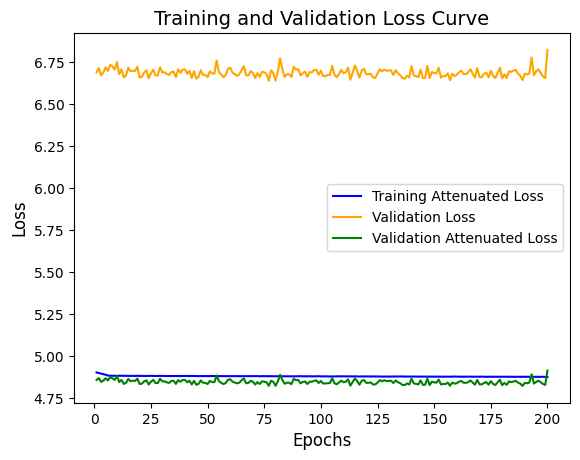

In [8]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()